In [1]:
# collect data
import numpy as np
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "ocFbDopa9RsW7rNTVkx-"

In [2]:
import os
import edgar
dirpath = os.getcwd()
dirpath

'/Users/haozhewang/Desktop/Cornell Study/Fall 19/ORIE 4741/ORIE4741-Group-Project'

In [3]:
quandl.get("WIKI/BKNG", start_date="1998-7-10", end_date="2018-7-10", collapse="quarterly")

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-31,2137.43,2140.24,2056.51,2077.56,402327.0,0.0,1.0,2137.43,2140.24,2056.51,2077.56,402327.0


In [4]:
import matplotlib.pyplot as plt

In [7]:
tickers = pd.read_excel("Other data/sp500_ticker.xlsx", sheet_name=0, header=0, index_col=False, keep_default_na=True)
p = tickers["Symbol"]
ll = []
for i in range(len(p)):
    if p[i] not in ["AMCR", "BF.B", "BRK.B", "CPRI", "GL", "LHX", "LIN", "LW", "EVRG", "CDW"]:
        ll.append(p[i])
ll = tuple(ll)

In [10]:
error_occurred = 0
for i in range(tickers.shape[0]):
    firm_ticker = tickers["Symbol"][i]
    ticker = "WIKI/" + firm_ticker
    try:
        historical_price = quandl.get(ticker, start_date="2009-1-01", end_date="2018-12-31", collapse="quarterly")
        path = dirpath + "/" + "historical_data_quarterly/" + firm_ticker + ".csv"
        historical_price.to_csv(path)
    except Exception:
        error_occurred += 1
        print(ticker)
print(error_occurred)

WIKI/AMCR
WIKI/BF.B
WIKI/BRK.B
WIKI/CPRI
WIKI/GL
WIKI/LHX
WIKI/LIN
WIKI/LW
WIKI/EVRG
WIKI/CDW
10


In [11]:
error_occurred = 0
for i in range(tickers.shape[0]):
    firm_ticker = tickers["Symbol"][i]
    ticker = "WIKI/" + firm_ticker
    try:
        historical_price = quandl.get(ticker, start_date="2009-1-01", end_date="2018-12-31", collapse="monthly")
        path = dirpath + "/" + "historical_data_monthly/" + firm_ticker + ".csv"
        historical_price.to_csv(path)
    except Exception:
        error_occurred += 1
        print(ticker)
print(error_occurred)

WIKI/AMCR
WIKI/BF.B
WIKI/BRK.B
WIKI/CPRI
WIKI/GL
WIKI/LHX
WIKI/LIN
WIKI/LW
WIKI/EVRG
WIKI/CDW
10


In [12]:
m_date = "2018-12-31,2018-9-30,2018-6-30,2018-3-31,2017-12-31,2017-9-30,2017-6-30,2017-3-31,2016-12-31,2016-9-30,2016-6-30,2016-3-31,2015-12-31,2015-9-30,2015-6-30,2015-3-31,2014-12-31,2014-9-30,2014-6-30,2014-3-31,2013-12-31,2013-9-30,2013-6-30,2013-3-31,2012-12-31,2012-9-30,2012-6-30,2012-3-31,2011-12-31,2011-9-30,2011-6-30,2011-3-31,2010-12-31,2010-9-30,2010-6-30,2010-3-31,2009-12-31,2009-9-30,2009-6-30,2009-3-31"

In [13]:
for i in range(len(ll)):
    core_data = quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', ticker=ll[i])

In [405]:
concatenate_data = []
for i in range(len(ll)):
    ticker_name = ll[i]
    core_data = quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', qopts={"columns":['ticker' ,'dimension','datekey', 'price', 
                                                                   'netinc','liabilities',
                                                  'equityusd', 'epsusd', 'revenueusd','netinccmnusd',
                                                  'debtusd', 'marketcap', 'equity','assets',
                                                  'fcf', 'gp', 'netmargin', 'pb', ]}, 
                 ticker=ticker_name)
    if core_data.shape[0] == 0:
        continue
    core_data["NPGR"] = core_data["netinc"].diff() / core_data["netinc"]
    core_data["BTMkt"] = core_data["equityusd"] / core_data["marketcap"]
    core_data["equitymultiplier"] = core_data["assets"] / core_data["equity"]
    core_data["ROE"] = core_data["netinc"] / core_data["equityusd"]
    # +1 if the price of next period increase. -1 otherwise
    #core_data["trend"] = -np.sign(core_data['price'].diff())
    temp = -np.sign(core_data['price'].diff())
    # classify 0 as 1 (price no change)
    temp[temp == 0] = 1
    core_data["trend"] = temp
    concatenate_data.append(core_data)
path = dirpath + "/" + "core_data/" + "concatenate.csv"
df = pd.concat(concatenate_data)
df.to_csv(path)    

In [406]:
path = dirpath + "/" + "core_data/" + "concatenate.csv"
total_data = pd.read_csv(path)
total_data = total_data.iloc[:,1:total_data.shape[1]]
total_data = total_data.dropna()
total_data

,ticker,dimension,datekey,price,netinc,liabilities,equityusd,epsusd,revenueusd,netinccmnusd,...,assets,fcf,gp,netmargin,pb,NPGR,BTMkt,equitymultiplier,ROE,trend
1,ADP,ARQ,2019-08-09,167.73,4.754000e+08,36487800000,5399900000,1.10,3.498700e+09,4.754000e+08,...,41887700000,6.160000e+08,1.478200e+09,0.136,13.479,-0.225074,0.074190,7.757125,0.088039,-1.0
2,ADP,ARQ,2019-05-03,160.19,7.537000e+08,42950100000,5246200000,1.74,3.847400e+09,7.537000e+08,...,48196300000,7.936000e+08,1.735600e+09,0.196,13.289,0.369245,0.075248,9.186897,0.143666,1.0
3,ADP,ARQ,2019-01-31,139.84,5.582000e+08,34042400000,4763900000,1.28,3.505900e+09,5.582000e+08,...,38806300000,6.879000e+08,1.492200e+09,0.159,12.788,-0.350233,0.078201,8.145910,0.117173,1.0
4,ADP,ARQ,2018-11-01,140.91,5.054000e+08,32737900000,4678800000,1.16,3.323200e+09,5.054000e+08,...,37416700000,3.220000e+07,1.382700e+09,0.152,13.183,-0.104472,0.075855,7.997072,0.108019,-1.0
5,ADP,ARQ,2018-08-03,134.25,1.087000e+08,33629100000,3459600000,0.26,3.318600e+09,1.087000e+08,...,37088700000,5.902000e+08,1.366300e+09,0.033,17.000,-3.649494,0.058824,10.720517,0.031420,1.0
6,ADP,ARQ,2018-05-04,125.36,6.431000e+08,40036300000,4029200000,1.46,3.693000e+09,6.431000e+08,...,44065500000,1.030200e+09,1.615600e+09,0.174,13.706,0.830975,0.072961,10.936538,0.159610,1.0
7,ADP,ARQ,2018-02-01,120.42,4.675000e+08,40614300000,3931200000,1.06,3.235400e+09,4.675000e+08,...,44545500000,3.227000e+08,1.288700e+09,0.144,13.578,-0.375615,0.073648,11.331273,0.118920,1.0
8,ADP,ARQ,2017-11-02,114.34,4.015000e+08,31707700000,3953400000,0.91,3.078800e+09,4.015000e+08,...,35661100000,1.017000e+08,1.212400e+09,0.130,12.827,-0.164384,0.077963,9.020362,0.101558,1.0
9,ADP,ARQ,2017-08-04,111.39,2.658000e+08,33203000000,3977000000,0.60,3.064900e+09,2.658000e+08,...,37180000000,3.232000e+08,1.217500e+09,0.087,12.446,-0.510534,0.080345,9.348755,0.066834,1.0
10,ADP,ARQ,2017-05-04,99.10,5.879000e+08,39752800000,4103100000,1.32,3.410800e+09,5.879000e+08,...,43855900000,7.173000e+08,1.499800e+09,0.172,10.806,0.547882,0.092541,10.688479,0.143282,1.0


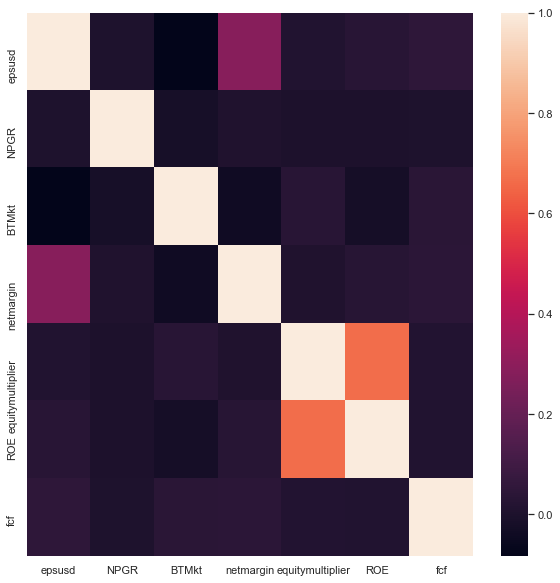

In [407]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

numerical_data = total_data.iloc[:, 3:total_data.shape[1]]

check_corr = numerical_data[['epsusd', 'NPGR', 'BTMkt', 'netmargin', 'equitymultiplier','ROE', 'fcf']]
plt.figure(figsize=(10,10))
ax = sns.heatmap(check_corr.corr())

In [408]:
ret = []
tickers = np.unique(total_data['ticker'])
for i in range(len(tickers)):
    ticker_name = tickers[i]
    ticker_data = total_data[total_data.ticker == ticker_name]
    price = ticker_data['price']
    price = price.values
    ret.append((price[len(price)-1] - price[0]) / price[0])

/Users/haozhewang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


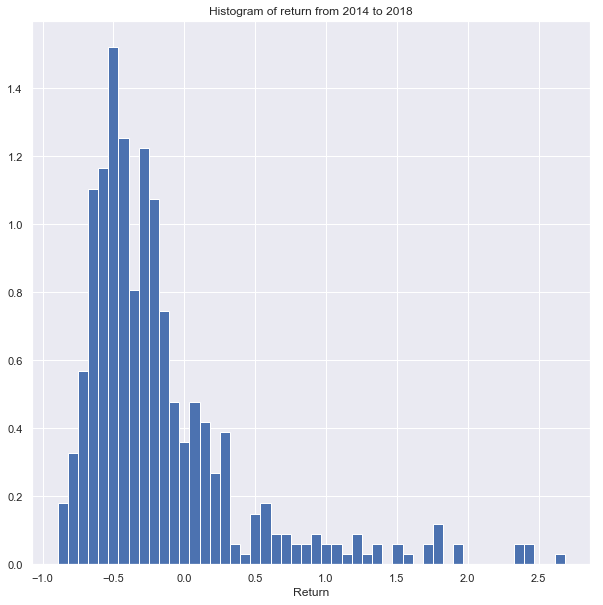

In [409]:
plt.figure(figsize=(10,10))
plt.hist(ret, bins=50, normed=True)
plt.xlabel('Return')
plt.title("Histogram of return from 2014 to 2018")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(total_data[])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [410]:
# fit linear SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
total_data = total_data.replace([np.inf, -np.inf], np.nan)
total_data = total_data.dropna()
fit_data = total_data[['epsusd', 'NPGR', 'BTMkt', 'netmargin', 'equitymultiplier','ROE', 'fcf']]
X = fit_data
y = total_data.iloc[:, 22]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# normalize
for i in range(fit_data.shape[1]):
    mu = np.mean(X_train.iloc[:,i])
    sigma = np.std(X_train.iloc[:,i])
    X_train.iloc[:,i] = (X_train.iloc[:,i] - mu) / sigma
    X_test.iloc[:,i] = (X_test.iloc[:,i] - mu) / sigma

/Users/haozhewang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [433]:
print(sum(y_train == 1))
print(sum(y_train == -1))
print(sum(y_train == 0))

4946
3193
0


,epsusd,NPGR,BTMkt,netmargin,equitymultiplier,ROE,fcf
1,1.10,-0.225074,0.074190,0.136,7.757125,0.088039,6.160000e+08
2,1.74,0.369245,0.075248,0.196,9.186897,0.143666,7.936000e+08
3,1.28,-0.350233,0.078201,0.159,8.145910,0.117173,6.879000e+08
4,1.16,-0.104472,0.075855,0.152,7.997072,0.108019,3.220000e+07
5,0.26,-3.649494,0.058824,0.033,10.720517,0.031420,5.902000e+08
6,1.46,0.830975,0.072961,0.174,10.936538,0.159610,1.030200e+09
7,1.06,-0.375615,0.073648,0.144,11.331273,0.118920,3.227000e+08
8,0.91,-0.164384,0.077963,0.130,9.020362,0.101558,1.017000e+08
9,0.60,-0.510534,0.080345,0.087,9.348755,0.066834,3.232000e+08
10,1.32,0.547882,0.092541,0.172,10.688479,0.143282,7.173000e+08


In [412]:
print(sum(y_test == 1))
print(sum(y_test == -1))
print(sum(y_test == 0))

1191
844
0


In [413]:
linsvm_clf = LinearSVC(penalty = 'l2', random_state=0, loss = 'hinge', max_iter = 5000)
linsvm_clf.fit(X_train, y_train)
# train accuracy
linsvm_clf.score(X_train, y_train)

0.6076913625752549

In [414]:
y_pred = linsvm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   0,  844],
       [   0, 1191]])

In [415]:
# test accuracy
linsvm_clf.score(X_test, y_test)

0.5852579852579852

In [416]:
# fit SVM
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)
# train accuracy
svm_clf.score(X_train, y_train)

0.6145718147192529

In [417]:
y_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   6,  838],
       [   9, 1182]])

In [418]:
# test accuracy
svm_clf.score(X_test, y_test)

0.5837837837837838

In [445]:
# fit random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=2000, max_depth=2, class_weight="balanced_subsample")
rf_clf.fit(X_train, y_train)
# train accuracy
rf_clf.score(X_train, y_train)

0.5624769627718393

In [446]:
y_pred = rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[384, 460],
       [481, 710]])

In [447]:
# test accuracy
rf_clf.score(X_test, y_test)

0.5375921375921376

In [448]:
print(rf_clf.feature_importances_)

[0.09143478 0.32350639 0.17780284 0.16478254 0.10073089 0.07228315
 0.06945941]


In [423]:
# fit logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(penalty='l1', random_state=0, solver='saga', max_iter=2000)
log_clf.fit(X_train, y_train)
# train accuracy
log_clf.score(X_train, y_train)

0.6076913625752549

In [424]:
y_pred = log_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   1,  843],
       [   0, 1191]])

In [425]:
# test accuracy
log_clf.score(X_test, y_test)

0.5857493857493857

In [426]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(log_clf.coef_))], axis = 1)
coefficients

,0,0
0,epsusd,0.006678
1,NPGR,0.008943
2,BTMkt,-0.055244
3,netmargin,0.036636
4,equitymultiplier,0.013080
5,ROE,-0.018647
6,fcf,-0.005963


In [427]:
# multilayer neural network
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn_clf.fit(X_train, y_train)
# train accuracy
nn_clf.score(X_train, y_train)

0.6095343408281115

In [428]:
y_pred = nn_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[   3,  841],
       [   2, 1189]])

In [429]:
# test accuracy
nn_clf.score(X_test, y_test)

0.5857493857493857

In [430]:
# boost
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=5000, random_state=0)
adaboost_clf.fit(X_train, y_train)
# train accuracy
adaboost_clf.score(X_train, y_train)

0.7118810664700823

In [431]:
y_pred = adaboost_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[177, 667],
       [241, 950]])

In [432]:
# test accuracy
adaboost_clf.score(X_test, y_test)

0.5538083538083538

In [452]:
adaboost_clf.feature_importances_

array([0.1116, 0.156 , 0.1694, 0.1274, 0.1684, 0.1214, 0.1458])

In [352]:
import glob
path = "historical_data_monthly/*.csv"
csv_list = []
for fname in glob.glob(path):
    names = fname.split('/')
    csv_list.append(names[1])

In [353]:
csv_list[0]

'CSCO.csv'

In [245]:
# folder = "historical_data_monthly"
# path = folder + '/' + csv_list[0]
# example = pd.read_csv(path)
# example[['Date', 'Close']]

,Date,Close
0,2009-01-31,14.970
1,2009-02-28,14.570
2,2009-03-31,16.770
3,2009-04-30,19.320
4,2009-05-31,18.500
5,2009-06-30,18.650
6,2009-07-31,22.010
7,2009-08-31,21.600
8,2009-09-30,23.540
9,2009-10-31,22.810


In [248]:
# total_data[total_data['ticker'] == 'CSCO']

,ticker,dimension,datekey,price,netinc,liabilities,equityusd,epsusd,revenueusd,netinccmnusd,...,assets,fcf,gp,netmargin,pb,NPGR,BTMkt,equitymultiplier,ROE,trend
1169,CSCO,ARQ,2019-05-21,56.52,3.044000e+09,60483000000,36804000000,0.70,1.295800e+10,3.044000e+09,...,97287000000,4.106000e+09,8.173000e+09,0.235,6.574,0.275296,0.152116,2.643381,0.082708,-1.0
1170,CSCO,ARQ,2019-02-19,49.65,2.822000e+09,61673000000,40789000000,0.63,1.244600e+10,2.822000e+09,...,102462000000,3.544000e+09,7.773000e+09,0.227,5.358,-0.078668,0.186626,2.512001,0.069185,1.0
1171,CSCO,ARQ,2018-11-20,44.49,3.549000e+09,61581000000,43848000000,0.78,1.307200e+10,3.549000e+09,...,105429000000,3.553000e+09,8.146000e+09,0.271,4.562,0.204846,0.219212,2.404420,0.080939,1.0
1172,CSCO,ARQ,2018-09-06,47.28,3.803000e+09,65580000000,43204000000,0.78,1.284400e+10,3.803000e+09,...,108784000000,3.891000e+09,7.922000e+09,0.296,5.003,0.066789,0.199896,2.517915,0.088024,-1.0
1173,CSCO,ARQ,2018-05-22,43.65,2.691000e+09,67347000000,46661000000,0.56,1.246300e+10,2.691000e+09,...,114008000000,2.178000e+09,7.759000e+09,0.216,4.399,-0.413229,0.227303,2.443325,0.057671,1.0
1174,CSCO,ARQ,2018-02-20,44.06,-8.778000e+09,79528000000,51982000000,-1.78,1.188700e+10,-8.778000e+09,...,131510000000,3.909000e+09,7.498000e+09,-0.738,4.083,1.306562,0.244898,2.529914,-0.168866,-1.0
1175,CSCO,ARQ,2017-11-21,36.65,2.394000e+09,64972000000,65550000000,0.48,1.213600e+10,2.394000e+09,...,130522000000,2.913000e+09,7.427000e+09,0.197,2.764,4.666667,0.361787,1.991182,0.036522,1.0
1176,CSCO,ARQ,2017-09-07,31.76,2.424000e+09,63681000000,66137000000,0.49,1.213300e+10,2.424000e+09,...,129818000000,3.794000e+09,7.546000e+09,0.200,2.378,0.012376,0.420521,1.962865,0.036651,1.0
1177,CSCO,ARQ,2017-05-23,31.76,2.515000e+09,60568000000,65382000000,0.50,1.194000e+10,2.515000e+09,...,125950000000,3.144000e+09,7.518000e+09,0.211,2.429,0.036183,0.411721,1.926371,0.038466,-0.0
1178,CSCO,ARQ,2017-02-21,34.13,2.348000e+09,62430000000,63811000000,0.47,1.158000e+10,2.348000e+09,...,126248000000,3.524000e+09,7.276000e+09,0.203,2.679,-0.071124,0.373342,1.978468,0.036796,-1.0


In [254]:
# core_data = quandl.get_table('SHARADAR/SF1', dimension = 'ARQ', qopts={"columns":['ticker' ,'dimension','datekey', 'price', 
#                                                                    'netinc','liabilities',
#                                                   'equityusd', 'epsusd', 'revenueusd','netinccmnusd',
#                                                   'debtusd', 'marketcap', 'equity','assets',
#                                                   'fcf', 'gp', 'netmargin', 'pb', ]}, 
#                  ticker=ll[0])
# core_data

,ticker,dimension,datekey,price,netinc,liabilities,equityusd,epsusd,revenueusd,netinccmnusd,debtusd,marketcap,equity,assets,fcf,gp,netmargin,pb
None,,,,,,,,,,,,,,,,,,
0,ADP,ARQ,2019-11-04,161.88,582400000,32354000000,5360700000,1.35,3495700000,582400000,6325400000,70045166647,5360700000,37714700000,311200000,1450900000,0.167,13.066
1,ADP,ARQ,2019-08-09,167.73,475400000,36487800000,5399900000,1.10,3498700000,475400000,2264200000,72785232050,5399900000,41887700000,616000000,1478200000,0.136,13.479
2,ADP,ARQ,2019-05-03,160.19,753700000,42950100000,5246200000,1.74,3847400000,753700000,2002300000,69719211285,5246200000,48196300000,793600000,1735600000,0.196,13.289
3,ADP,ARQ,2019-01-31,139.84,558200000,34042400000,4763900000,1.28,3505900000,558200000,3208300000,60918451095,4763900000,38806300000,687900000,1492200000,0.159,12.788
4,ADP,ARQ,2018-11-01,140.91,505400000,32737900000,4678800000,1.16,3323200000,505400000,2455400000,61680886434,4678800000,37416700000,32200000,1382700000,0.152,13.183
5,ADP,ARQ,2018-08-03,134.25,108700000,33629100000,3459600000,0.26,3318600000,108700000,2002400000,58812609993,3459600000,37088700000,590200000,1366300000,0.033,17.000
6,ADP,ARQ,2018-05-04,125.36,643100000,40036300000,4029200000,1.46,3693000000,643100000,2002400000,55223878537,4029200000,44065500000,1030200000,1615600000,0.174,13.706
7,ADP,ARQ,2018-02-01,120.42,467500000,40614300000,3931200000,1.06,3235400000,467500000,2002400000,53378532096,3931200000,44545500000,322700000,1288700000,0.144,13.578
8,ADP,ARQ,2017-11-02,114.34,401500000,31707700000,3953400000,0.91,3078800000,401500000,2131500000,50708615728,3953400000,35661100000,101700000,1212400000,0.130,12.827
